<a href="https://colab.research.google.com/github/jayesh2278/Product_lifecycle_stage_detection/blob/main/PLC_stages_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install tslearn ruptures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tslearn.clustering import KShape, TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from sklearn.metrics import silhouette_score
import ruptures as rpt



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.2 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv('/content/sample_sales.csv')
df.head(10)

,date,product_name,quantity
0,2023-02-01,SHAWL 189 BE MY PALETTE PLEASE BY ARIANI,1
1,2023-02-02,SHAWL 189 BE MY PALETTE PLEASE BY ARIANI,3
2,2023-02-02,SHAWL 189 PALETTE EDITION BY ARIANI,1
3,2023-02-04,TIE BACK INNER 63 (VOL 3),1
4,2023-02-05,SHAWL 189 BE MY PALETTE PLEASE BY ARIANI,1
5,2023-02-05,SHAWL 189 PALETTE EDITION BY ARIANI,1
6,2023-02-06,SHAWL 189 BE MY PALETTE PLEASE BY ARIANI,1
7,2023-02-07,SHAWL 189 BE MY PALETTE PLEASE BY ARIANI,2
8,2023-02-07,TIE BACK INNER 63 (VOL 3),5
9,2023-02-08,ARIANI KN 95 HEADLOOP MASK,2


In [ ]:
df['product_name'].unique()

array(['SHAWL 189 BE MY PALETTE PLEASE BY ARIANI',
       'SHAWL 189 PALETTE EDITION BY ARIANI', 'TIE BACK INNER 63 (VOL 3)',
       'ARIANI KN 95 HEADLOOP MASK', 'SHAWL 199 POPSICLE BY ARIANI',
       'SQUARE 189 POPSICLE BY ARIANI',
       'SHAWL 229 POPSICLE EMBROIDERY DIAMOND',
       'SQ 229 POPSICLE EMBROIDERY DIAMOND',
       'SHAWL 228 WARDAH PLAIN DIAMOND', 'SHAWL 159 HUSH PLAIN EYELASH',
       'SAMPUL RIA RAYA 2022', 'SHAWL 238 WARDIYAH PLAIN DIAMOND',
       'SQ 89 EASE BASIC (VOL 2)',
       'SHAWL  298 LUMIERE EVE PLAIN DIAMOND\n\n', 'LUNCH GANG',
       'SHAWL 238 LUMIERE EVY PLAIN DIAMOND',
       'SQUARE 229 GRACE ISLE PLAIN DIAMOND',
       'IKAT TEPI VOILE SQUARE SCARF', 'SQ 119 CLEO VOILE PRINTED ',
       'SHAWL 129 INDULGENT BASIC PLAIN ', 'SQ 89 DIAN VOILE PRINTED',
       'SQ 119 RISE BY ARIANI', 'SQ 138 PRIME BASIC VOILE ',
       "SHAWL BASIC D'LUXE", 'SHAWL LENA PLAIN DIAMOND',
       "SQ BASIC D'CREPE PLAIN", "SQ BASIC D'CREPE PLAIN (MINI)",
       'SQ GRACE

In [ ]:
product_names_list = ['SHAWL 189 BE MY PALETTE PLEASE BY ARIANI',
       'SHAWL 189 PALETTE EDITION BY ARIANI', 'TIE BACK INNER 63 (VOL 3)',
       'ARIANI KN 95 HEADLOOP MASK', 'SHAWL 199 POPSICLE BY ARIANI',
       'SQUARE 189 POPSICLE BY ARIANI',
       'SHAWL 229 POPSICLE EMBROIDERY DIAMOND',
       'SQ 229 POPSICLE EMBROIDERY DIAMOND',
       'SHAWL 228 WARDAH PLAIN DIAMOND', 'SHAWL 159 HUSH PLAIN EYELASH',
       'SAMPUL RIA RAYA 2022', 'SHAWL 238 WARDIYAH PLAIN DIAMOND',
       'SQ 89 EASE BASIC (VOL 2)',
       'SHAWL  298 LUMIERE EVE PLAIN DIAMOND\n\n', 'LUNCH GANG',
       'SHAWL 238 LUMIERE EVY PLAIN DIAMOND',
       'SQUARE 229 GRACE ISLE PLAIN DIAMOND',
       'IKAT TEPI VOILE SQUARE SCARF', 'SQ 119 CLEO VOILE PRINTED ',
       'SHAWL 129 INDULGENT BASIC PLAIN ', 'SQ 89 DIAN VOILE PRINTED',
       'SQ 119 RISE BY ARIANI', 'SQ 138 PRIME BASIC VOILE ',
       "SHAWL BASIC D'LUXE", 'SHAWL LENA PLAIN DIAMOND',
       "SQ BASIC D'CREPE PLAIN", "SQ BASIC D'CREPE PLAIN (MINI)",
       'SQ GRACE FAYRA PLAIN DIAMOND', 'SHAWL LEYA PLAIN DIAMOND',
       'SHAWL TRUE BASIC PLAIN', 'SQ GRACE FEYRE PLAIN DIAMOND',
       'ICONIC MONO REUSABLE CUP', 'SHAWL LUMIERE ALYA PLAIN DIAMOND',
       'SHAWL TRUE BASIC PLAIN VOL 2', 'SHAWL YASMIN BASIC PLAIN',
       'SAMPUL RAYA GALERI 2024', 'SQ ALYN VOILE PRINTED LASERCUT',
       'SQ ISHA VOILE PRINTED LASERCUT',
       'SQ PIETRA VOILE PRINTED LASERCUT',
       'SQ TAHARA VOILE PRINTED LASERCUT ',
       'SQ THIYA VOILE PRINTED LASERCUT',
       'SQ ANAISA VOILE PRINTED LASERCUT',
       'SQ ARIELLA VOILE PRINTED LASERCUT',
       'SQ SACHA VOILE PRINTED LASERCUT',
       'SQ TARA VOILE PRINTED LASERCUT',
       'SQ ANGGRIK VOILE PLAIN EMBROIDERY',
       'SQ KUNTUM VOILE PLAIN EMBROIDERY', 'SQ BASIC GRACE PLAIN ',
       "SHAWL D'LUXE PLAIN EMBROIDERY", 'SQ DANIELLA VOILE LASERCUT']

Enter the product name you want to analyze: SQ ALYN VOILE PRINTED LASERCUT


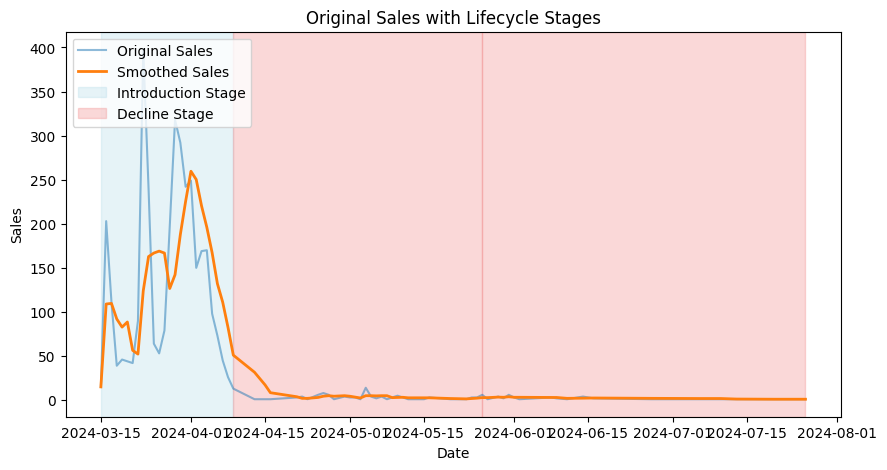

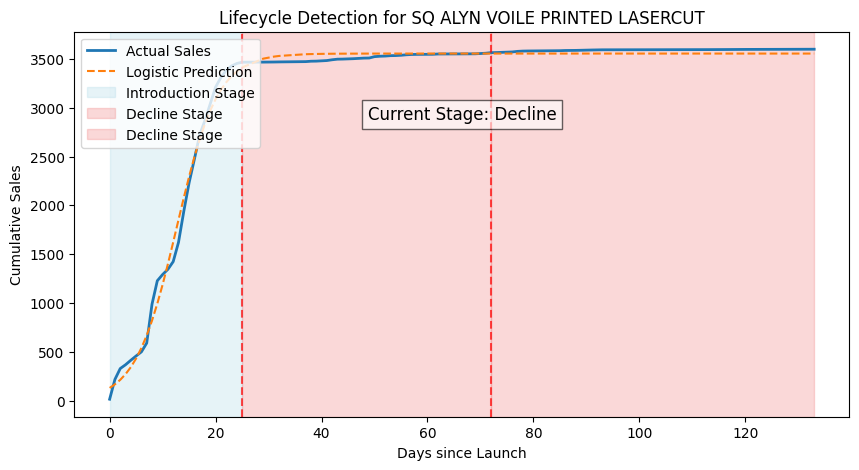

In [ ]:
# Imports
import pandas as pd
import numpy as np
import ruptures as rpt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load Sales Data
df = pd.read_csv('/content/sample_sales.csv')

# Select a Product by Grouping
product_name = input("Enter the product name you want to analyze: ")

df_product = df[df['product_name'] == product_name].copy()

# Ensure timestamp is properly converted
df_product['timestamp'] = pd.to_datetime(df_product['date'])
df_product = df_product[['timestamp', 'quantity']].rename(columns={'quantity': 'sales'})

# Add Smoothed Sales Column (Rolling Average)
df_product['smoothed_sales'] = df_product['sales'].rolling(window=5, min_periods=1).mean()

# Sort Data by Timestamp and Compute Cumulative Sales
df_product = df_product.sort_values(by='timestamp')
df_product['cumulative_sales'] = df_product['sales'].cumsum()

# Logistic Growth Function Definition
def logistic_growth(t, a, b, c):
    """Logistic growth function: c / (1 + a * exp(-b * t))"""
    return c / (1 + a * np.exp(-b * t))

# Normalize Time Variable (Days since Launch)
df_product['days'] = (df_product['timestamp'] - df_product['timestamp'].min()).dt.days

# Fit Logistic Curve to the Cumulative Sales Data
initial_guess = [1, 1, df_product['cumulative_sales'].max()]  # Initial guess for fitting
try:
    params, _ = curve_fit(
        logistic_growth,
        df_product['days'],
        df_product['cumulative_sales'],
        p0=initial_guess,
        maxfev=10000,
        bounds=(0, np.inf)
    )
except RuntimeError as e:
    print(f"Error fitting curve: {e}")
    params = [1, 1, df_product['cumulative_sales'].max()]  # Fallback values

# Extract Parameters
a, b, c = params

# Generate Predictions for Logistic Growth
df_product['logistic_prediction'] = logistic_growth(df_product['days'], a, b, c)

# Detect Change Points Using Ruptures Library
growth_rate = np.diff(df_product['logistic_prediction'])
algo = rpt.Pelt(model="rbf").fit(growth_rate)
change_points = algo.predict(pen=15)  # Detect change points

# Add Final Day as a Change Point if Missing
if change_points[-1] != df_product['days'].iloc[-1]:
    change_points.append(df_product['days'].iloc[-1])

# Ensure Change Points are Valid
if len(change_points) < 2:
    print("Not enough change points detected; skipping segmentation.")
    change_points = [0, df_product['days'].iloc[-1]]  # Default to full range

# Function to Determine Lifecycle Stages
def determine_stage(segment_data, is_first_segment=False):
    """Determine the stage of the product lifecycle based on sales trends."""
    if segment_data.empty:
        return 'Unknown'  # Fallback for empty segments

    sales_change = segment_data['sales'].diff().mean()  # Average change in sales
    recent_sales = segment_data['sales'].sum()

    if is_first_segment and sales_change > 0:
        return 'Introduction'
    elif sales_change > 0:
        return 'Growth'
    elif sales_change < 0 and recent_sales > 0.1 * df_product['cumulative_sales'].max():
        return 'Maturity'
    else:
        return 'Decline'

# Segment Data by Detected Change Points
segments = [(0, change_points[0])] + [
    (change_points[i], change_points[i + 1]) for i in range(len(change_points) - 1)
]
stages = []

# Assign Stages to Segments
for i, (start, end) in enumerate(segments):
    segment_data = df_product[(df_product['days'] >= start) & (df_product['days'] < end)]
    is_first_segment = (i == 0)  # First segment can be 'Introduction'
    stage = determine_stage(segment_data, is_first_segment)
    stages.append(stage)

# Colors for Stages
colors = {
    'Introduction': 'lightblue',
    'Growth': 'lightgreen',
    'Maturity': 'lightyellow',
    'Decline': 'lightcoral',
    'Unknown': 'grey'
}

# -------------------
# Plot 1: Smoothed Sales Trend with Lifecycle Stages
# -------------------
plt.figure(figsize=(10, 5))  # Adjust size for better visibility

# Plot original and smoothed sales
plt.plot(df_product['timestamp'], df_product['sales'], label='Original Sales', alpha=0.5)
plt.plot(df_product['timestamp'], df_product['smoothed_sales'], label='Smoothed Sales', linewidth=2)

# Overlay lifecycle stages using axvspan
for i, (start, end) in enumerate(segments):
    stage_label = stages[i]
    stage_color = colors.get(stage_label, 'grey')

    # Ensure segment dates exist
    start_date = df_product[df_product['days'] == start]['timestamp']
    end_date = df_product[df_product['days'] == end]['timestamp']

    if not start_date.empty and not end_date.empty:
        plt.axvspan(start_date.values[0], end_date.values[0], color=stage_color, alpha=0.3, label=f'{stage_label} Stage')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Original Sales with Lifecycle Stages')

# Handle legend to avoid duplicate entries
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='upper left')

plt.show()

# -------------------
# Plot 2: Cumulative Sales with Lifecycle Detection
# -------------------
plt.figure(figsize=(10, 5))

# Plot cumulative sales and logistic prediction
plt.plot(df_product['days'], df_product['cumulative_sales'], label='Actual Sales', linewidth=2)
plt.plot(df_product['days'], df_product['logistic_prediction'], label='Logistic Prediction', linestyle='--')

# Highlight lifecycle stages on the x-axis
for i, (start, end) in enumerate(segments):
    stage_label = stages[i]
    stage_color = colors.get(stage_label, 'grey')
    plt.axvspan(start, end, color=stage_color, alpha=0.3, label=f'{stage_label} Stage')

# Add vertical lines for change points
for cp in change_points[:-1]:
    plt.axvline(x=cp, color='red', linestyle='--', alpha=0.7)

# Display the current stage with a text box
current_stage = stages[-1]
plt.text(df_product['days'].iloc[-1] / 2, df_product['cumulative_sales'].max() * 0.8,
        f'Current Stage: {current_stage}', fontsize=12, ha='center',
        bbox=dict(facecolor='white', alpha=0.6))

# Add labels and title
plt.xlabel('Days since Launch')
plt.ylabel('Cumulative Sales')
plt.title(f'Lifecycle Detection for {product_name}')
plt.legend(loc='upper left')

plt.show()

# Use Binseg model for better change point detection And Add Smoothed Sales window=3

Enter the product name you want to analyze: SHAWL LENA PLAIN DIAMOND


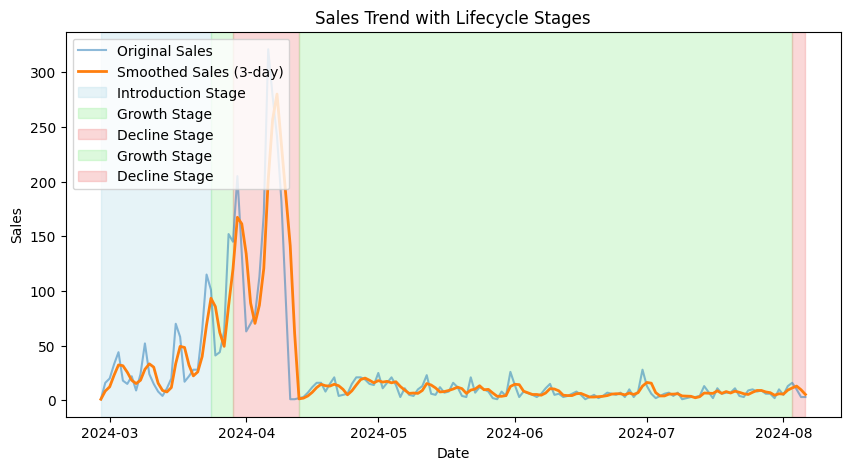

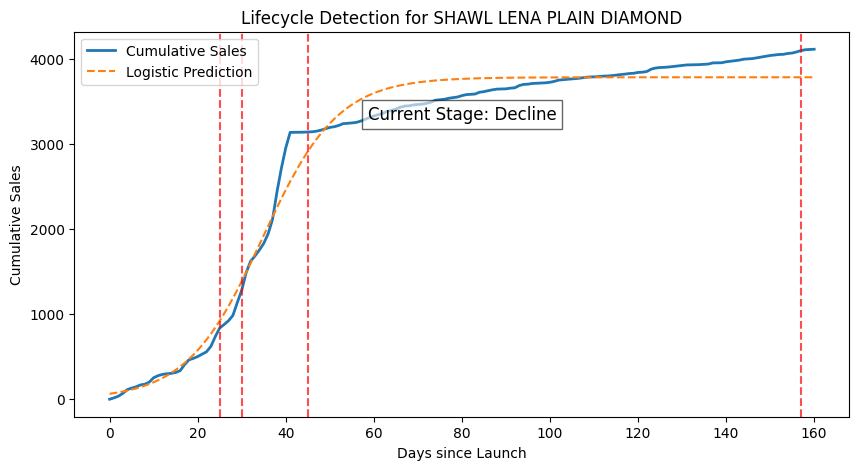

In [ ]:
# Imports
import pandas as pd
import numpy as np
import ruptures as rpt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load Sales Data
df = pd.read_csv('/content/sample_sales.csv')

# Select a Product by Grouping
product_name = input("Enter the product name you want to analyze: ")
df_product = df[df['product_name'] == product_name].copy()

# Ensure timestamp is properly converted
df_product['timestamp'] = pd.to_datetime(df_product['date'])
df_product = df_product[['timestamp', 'quantity']].rename(columns={'quantity': 'sales'})

# Add Smoothed Sales and Sales Diff for Better Change Point Detection
df_product['smoothed_sales'] = df_product['sales'].rolling(window=3, min_periods=1).mean()
df_product['sales_diff'] = df_product['sales'].diff().fillna(0)

# Sort Data by Timestamp and Compute Cumulative Sales
df_product = df_product.sort_values(by='timestamp')
df_product['cumulative_sales'] = df_product['sales'].cumsum()

# Normalize Time Variable (Days since Launch)
df_product['days'] = (df_product['timestamp'] - df_product['timestamp'].min()).dt.days

# Logistic Growth Function
def logistic_growth(t, a, b, c):
    """Logistic growth function: c / (1 + a * exp(-b * t))"""
    return c / (1 + a * np.exp(-b * t))

# Fit Logistic Curve to Cumulative Sales Data
initial_guess = [1, 0.1, df_product['cumulative_sales'].max()]  # Adjusted initial guess
try:
    params, _ = curve_fit(
        logistic_growth,
        df_product['days'],
        df_product['cumulative_sales'],
        p0=initial_guess,
        maxfev=10000,
        bounds=(0, np.inf)
    )
except RuntimeError as e:
    print(f"Error fitting curve: {e}")
    params = initial_guess  # Fallback to initial guess

# Extract Parameters from the Logistic Growth Model
a, b, c = params

# Generate Predictions for Logistic Growth
df_product['logistic_prediction'] = logistic_growth(df_product['days'], a, b, c)

# Step 1: Apply Improved Change Point Detection on Smoothed Sales
smoothed_sales_values = df_product['smoothed_sales'].values

# Use the Binseg model from Code 1 for better change point detection
algo = rpt.Binseg(model="l2").fit(smoothed_sales_values)
change_points = algo.predict(n_bkps=3)  # Limit to 3 breakpoints for better segmentation

# Ensure Final Day is Included in Change Points
if change_points[-1] != df_product['days'].iloc[-1]:
    change_points.append(df_product['days'].iloc[-1])

# Segment Data Based on Change Points
segments = [(0, change_points[0])] + [
    (change_points[i], change_points[i + 1]) for i in range(len(change_points) - 1)
]
stages = []

# Step 2: Refine Lifecycle Stage Assignment Logic
for i, (start, end) in enumerate(segments):
    segment_data = df_product[(df_product['days'] >= start) & (df_product['days'] < end)]

    # Calculate average sales change within the segment
    sales_change = segment_data['sales'].diff().mean()
    total_sales = segment_data['sales'].sum()

    # Assign lifecycle stages based on segment behavior
    if i == 0:  # First segment: Introduction phase
        stages.append('Introduction')
    elif sales_change > 0:
        stages.append('Growth')
    elif sales_change <= 0 and total_sales > 0.5 * df_product['cumulative_sales'].max():
        stages.append('Maturity')
    else:
        stages.append('Decline')

# Step 3: Visualization of Sales with Lifecycle Stages
colors = {
    'Introduction': 'lightblue',
    'Growth': 'lightgreen',
    'Maturity': 'yellow',
    'Decline': 'lightcoral'
}

plt.figure(figsize=(10, 5))

# Plot original and smoothed sales
plt.plot(df_product['timestamp'], df_product['sales'], label='Original Sales', alpha=0.5)
plt.plot(df_product['timestamp'], df_product['smoothed_sales'], label='Smoothed Sales (3-day)', linewidth=2)

# Overlay lifecycle stages with axvspan
for i, (start, end) in enumerate(segments):
    stage_label = stages[i]
    stage_color = colors[stage_label]

    start_date = df_product[df_product['days'] == start]['timestamp']
    end_date = df_product[df_product['days'] == end]['timestamp']

    if not start_date.empty and not end_date.empty:
        plt.axvspan(start_date.values[0], end_date.values[0], color=stage_color, alpha=0.3, label=f'{stage_label} Stage')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend with Lifecycle Stages')
plt.legend(loc='upper left')
plt.show()

# Plot 2: Cumulative Sales with Change Points and Stages
plt.figure(figsize=(10, 5))
plt.plot(df_product['days'], df_product['cumulative_sales'], label='Cumulative Sales', linewidth=2)
plt.plot(df_product['days'], df_product['logistic_prediction'], label='Logistic Prediction', linestyle='--')

# Add vertical lines for change points
for cp in change_points[:-1]:
    plt.axvline(x=cp, color='red', linestyle='--', alpha=0.7)

# Display the current stage
current_stage = stages[-1]
plt.text(df_product['days'].iloc[-1] / 2, df_product['cumulative_sales'].max() * 0.8,
         f'Current Stage: {current_stage}', fontsize=12, ha='center',
         bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel('Days since Launch')
plt.ylabel('Cumulative Sales')
plt.title(f'Lifecycle Detection for {product_name}')
plt.legend(loc='upper left')
plt.show()


In [ ]:
product_names_list = ['SHAWL 189 BE MY PALETTE PLEASE BY ARIANI',
       'SHAWL 189 PALETTE EDITION BY ARIANI', 'TIE BACK INNER 63 (VOL 3)',
       'ARIANI KN 95 HEADLOOP MASK', 'SHAWL 199 POPSICLE BY ARIANI',
       'SQUARE 189 POPSICLE BY ARIANI',
       'SHAWL 229 POPSICLE EMBROIDERY DIAMOND',
       'SQ 229 POPSICLE EMBROIDERY DIAMOND',
       'SHAWL 228 WARDAH PLAIN DIAMOND', 'SHAWL 159 HUSH PLAIN EYELASH',
       'SAMPUL RIA RAYA 2022', 'SHAWL 238 WARDIYAH PLAIN DIAMOND',
       'SQ 89 EASE BASIC (VOL 2)',
       'SHAWL  298 LUMIERE EVE PLAIN DIAMOND\n\n', 'LUNCH GANG',
       'SHAWL 238 LUMIERE EVY PLAIN DIAMOND',
       'SQUARE 229 GRACE ISLE PLAIN DIAMOND',
       'IKAT TEPI VOILE SQUARE SCARF', 'SQ 119 CLEO VOILE PRINTED ',
       'SHAWL 129 INDULGENT BASIC PLAIN ', 'SQ 89 DIAN VOILE PRINTED',
       'SQ 119 RISE BY ARIANI', 'SQ 138 PRIME BASIC VOILE ',
       "SHAWL BASIC D'LUXE", 'SHAWL LENA PLAIN DIAMOND',
       "SQ BASIC D'CREPE PLAIN", "SQ BASIC D'CREPE PLAIN (MINI)",
       'SQ GRACE FAYRA PLAIN DIAMOND', 'SHAWL LEYA PLAIN DIAMOND',
       'SHAWL TRUE BASIC PLAIN', 'SQ GRACE FEYRE PLAIN DIAMOND',
       'ICONIC MONO REUSABLE CUP', 'SHAWL LUMIERE ALYA PLAIN DIAMOND',
       'SHAWL TRUE BASIC PLAIN VOL 2', 'SHAWL YASMIN BASIC PLAIN',
       'SAMPUL RAYA GALERI 2024', 'SQ ALYN VOILE PRINTED LASERCUT',
       'SQ ISHA VOILE PRINTED LASERCUT',
       'SQ PIETRA VOILE PRINTED LASERCUT',
       'SQ TAHARA VOILE PRINTED LASERCUT ',
       'SQ THIYA VOILE PRINTED LASERCUT',
       'SQ ANAISA VOILE PRINTED LASERCUT',
       'SQ ARIELLA VOILE PRINTED LASERCUT',
       'SQ SACHA VOILE PRINTED LASERCUT',
       'SQ TARA VOILE PRINTED LASERCUT',
       'SQ ANGGRIK VOILE PLAIN EMBROIDERY',
       'SQ KUNTUM VOILE PLAIN EMBROIDERY', 'SQ BASIC GRACE PLAIN ',
       "SHAWL D'LUXE PLAIN EMBROIDERY", 'SQ DANIELLA VOILE LASERCUT']

# Grid Search over n_bkps from 1 to 5

Enter the product name you want to analyze: SQ ALYN VOILE PRINTED LASERCUT
n_bkps: 1, Cost: 154830.51407407408
n_bkps: 2, Cost: 127475.0111111111
n_bkps: 3, Cost: 102917.14074074075
n_bkps: 4, Cost: 78809.04074074075
n_bkps: 5, Cost: 76608.76296296297

Optimal n_bkps: 5 with Cost: 76608.76296296297
Optimal Change Points: [5, 10, 15, 20, 25, 73, 133]


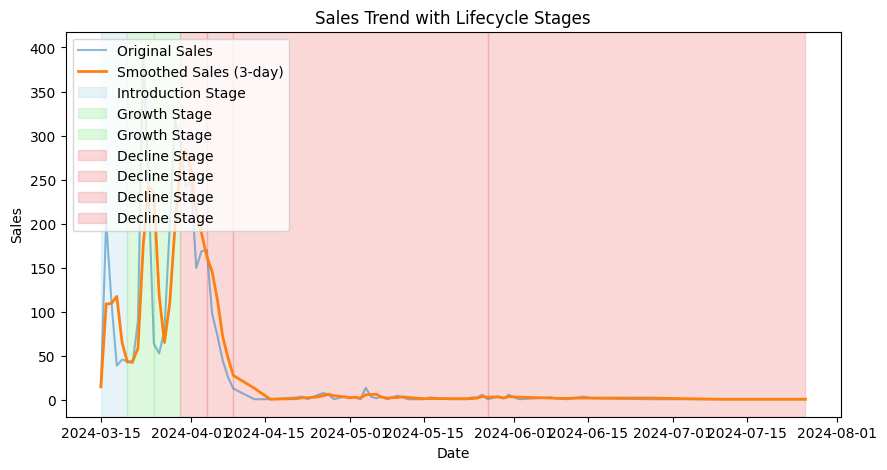

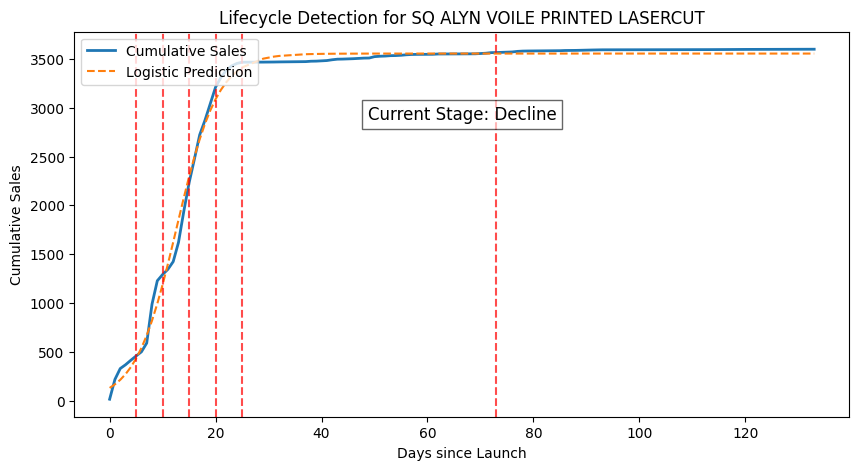

In [ ]:
# Imports
import pandas as pd
import numpy as np
import ruptures as rpt
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Load Sales Data
df = pd.read_csv('/content/sample_sales.csv')

# Select a Product by Grouping
product_name = input("Enter the product name you want to analyze: ")
df_product = df[df['product_name'] == product_name].copy()

# Ensure timestamp is properly converted
df_product['timestamp'] = pd.to_datetime(df_product['date'])
df_product = df_product[['timestamp', 'quantity']].rename(columns={'quantity': 'sales'})

# Add Smoothed Sales and Sales Diff for Better Change Point Detection
df_product['smoothed_sales'] = df_product['sales'].rolling(window=3, min_periods=1).mean()
df_product['sales_diff'] = df_product['sales'].diff().fillna(0)

# Sort Data by Timestamp and Compute Cumulative Sales
df_product = df_product.sort_values(by='timestamp')
df_product['cumulative_sales'] = df_product['sales'].cumsum()

# Normalize Time Variable (Days since Launch)
df_product['days'] = (df_product['timestamp'] - df_product['timestamp'].min()).dt.days

# Logistic Growth Function Definition
def logistic_growth(t, a, b, c):
    """Logistic growth function: c / (1 + a * exp(-b * t))"""
    return c / (1 + a * np.exp(-b * t))

# Fit Logistic Curve to Cumulative Sales Data
initial_guess = [1, 0.1, df_product['cumulative_sales'].max()]  # Adjusted initial guess
try:
    params, _ = curve_fit(
        logistic_growth,
        df_product['days'],
        df_product['cumulative_sales'],
        p0=initial_guess,
        maxfev=10000,
        bounds=(0, np.inf)
    )
except RuntimeError as e:
    print(f"Error fitting curve: {e}")
    params = initial_guess  # Fallback to initial guess

# Extract Parameters from Logistic Growth Model
a, b, c = params

# Generate Predictions for Logistic Growth
df_product['logistic_prediction'] = logistic_growth(df_product['days'], a, b, c)

# Initialize Variables for Grid Search over Breakpoints (n_bkps)
best_n_bkps = None
best_cost = float('inf')  # Initialize with a large cost to find minimum
costs = []  # Store costs for each n_bkps value

# Use Smoothed Sales for Change Point Detection
smoothed_sales_values = df_product['smoothed_sales'].values

# Grid Search: Iterate over n_bkps from 1 to 5
for n_bkps in range(1, 6):
    # Apply Binary Segmentation with current n_bkps
    algo = rpt.Binseg(model="l2").fit(smoothed_sales_values)
    change_points = algo.predict(n_bkps=n_bkps)

    # Calculate the cost for the current segmentation
    cost = algo.cost.sum_of_costs(change_points)  # Pass breakpoints (bkps) here
    costs.append(cost)

    print(f"n_bkps: {n_bkps}, Cost: {cost}")

    # Update best_n_bkps if a lower cost is found
    if cost < best_cost:
        best_cost = cost
        best_n_bkps = n_bkps

print(f"\nOptimal n_bkps: {best_n_bkps} with Cost: {best_cost}")

# Apply the Optimal Number of Breakpoints to Get Final Change Points
algo = rpt.Binseg(model="l2").fit(smoothed_sales_values)
final_change_points = algo.predict(n_bkps=best_n_bkps)

# Ensure Final Day is Included in Change Points
if final_change_points[-1] != df_product['days'].iloc[-1]:
    final_change_points.append(df_product['days'].iloc[-1])

# Print the Final Optimal Change Points
print(f"Optimal Change Points: {final_change_points}")

# Segment Data Based on Final Change Points
segments = [(0, final_change_points[0])] + [
    (final_change_points[i], final_change_points[i + 1]) for i in range(len(final_change_points) - 1)
]
stages = []

# Refine Lifecycle Stage Assignment Logic
for i, (start, end) in enumerate(segments):
    segment_data = df_product[(df_product['days'] >= start) & (df_product['days'] < end)]

    # Calculate average sales change within the segment
    sales_change = segment_data['sales'].diff().mean()
    total_sales = segment_data['sales'].sum()

    # Assign Lifecycle Stages Based on Segment Behavior
    if i == 0:  # First segment: Introduction phase
        stages.append('Introduction')
    elif sales_change > 0:
        stages.append('Growth')
    elif sales_change <= 0 and total_sales > 0.5 * df_product['cumulative_sales'].max():
        stages.append('Maturity')
    else:
        stages.append('Decline')

# Colors for Visualization
colors = {
    'Introduction': 'lightblue',
    'Growth': 'lightgreen',
    'Maturity': 'lightyellow',
    'Decline': 'lightcoral'
}

# Plot 1: Smoothed Sales Trend with Lifecycle Stages
plt.figure(figsize=(10, 5))
plt.plot(df_product['timestamp'], df_product['sales'], label='Original Sales', alpha=0.5)
plt.plot(df_product['timestamp'], df_product['smoothed_sales'], label='Smoothed Sales (3-day)', linewidth=2)

# Overlay Lifecycle Stages with axvspan
for i, (start, end) in enumerate(segments):
    stage_label = stages[i]
    stage_color = colors[stage_label]

    start_date = df_product[df_product['days'] == start]['timestamp']
    end_date = df_product[df_product['days'] == end]['timestamp']

    if not start_date.empty and not end_date.empty:
        plt.axvspan(start_date.values[0], end_date.values[0], color=stage_color, alpha=0.3, label=f'{stage_label} Stage')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Trend with Lifecycle Stages')
plt.legend(loc='upper left')
plt.show()

# Plot 2: Cumulative Sales with Change Points and Stages
plt.figure(figsize=(10, 5))
plt.plot(df_product['days'], df_product['cumulative_sales'], label='Cumulative Sales', linewidth=2)
plt.plot(df_product['days'], df_product['logistic_prediction'], label='Logistic Prediction', linestyle='--')

# Add Vertical Lines for Change Points
for cp in final_change_points[:-1]:
    plt.axvline(x=cp, color='red', linestyle='--', alpha=0.7)

# Display the Current Stage
current_stage = stages[-1]
plt.text(df_product['days'].iloc[-1] / 2, df_product['cumulative_sales'].max() * 0.8,
         f'Current Stage: {current_stage}', fontsize=12, ha='center',
         bbox=dict(facecolor='white', alpha=0.6))

plt.xlabel('Days since Launch')
plt.ylabel('Cumulative Sales')
plt.title(f'Lifecycle Detection for {product_name}')
plt.legend(loc='upper left')
plt.show()
